!["logo"](https://www.acted.org/wp-content/uploads/2018/03/fao-nu-logo.png)


# Importation des librairies. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.options.display.float_format = "{:,.2f}".format 


# Importation et exploration des donnees

Cette première phase d'exploration des csv va suivre les mêmes étapes pour chaque fichier, à savoir :


- Importation des fichiers.
- Création d'une copie dans un dataframe.
- Affichage des premières lignes.
- Vérification des types de données et la présence de valeurs NaN.
- Nettoyage au vu des résultats obtenus.

## 1 Population 


Le fichier de population inclut :
- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

In [2]:
# Importation des fichiers.
population = pd.read_csv("population.csv")

# Création d'une copie dans un dataframe.
df_population = population.copy()

# Affichage des premières lignes.
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269.59"
1,Afghanistan,2014,"33,370.79"
2,Afghanistan,2015,"34,413.60"
3,Afghanistan,2016,"35,383.03"
4,Afghanistan,2017,"36,296.11"


In [3]:
# Vérification des types de données et la présence de valeurs NaN 
df_population.info()
df_population.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


Zone      0
Année     0
Valeur    0
dtype: int64

In [4]:
# Nettoyage au vu des résultats obtenus.

# On renomme la colonne "Valeur" de manière plus explicite.
df_population = df_population.rename(columns = {"Valeur": "Population"})
df_population.head()

,Zone,Année,Population
0,Afghanistan,2013,"32,269.59"
1,Afghanistan,2014,"33,370.79"
2,Afghanistan,2015,"34,413.60"
3,Afghanistan,2016,"35,383.03"
4,Afghanistan,2017,"36,296.11"


In [5]:
# On convertit la population en Millions.
df_population["Population"] = df_population["Population"]*1000
df_population.head()

,Zone,Année,Population
0,Afghanistan,2013,"32,269,589.00"
1,Afghanistan,2014,"33,370,794.00"
2,Afghanistan,2015,"34,413,603.00"
3,Afghanistan,2016,"35,383,032.00"
4,Afghanistan,2017,"36,296,113.00"


## 2 Aide Alimentaire

Le fichier d’aide alimentaire contient :


- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.


In [6]:
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
df_aide_alimentaire = aide_alimentaire.copy()
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [7]:
df_aide_alimentaire.info()
df_aide_alimentaire.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [8]:
# On renomme les colonnes de manière plus explicite.
df_aide_alimentaire = df_aide_alimentaire.rename(columns = {"Pays bénéficiaire": "Zone", "Valeur": "Quantite_Aide"})
df_aide_alimentaire.head()

,Zone,Année,Produit,Quantite_Aide
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


## 3 Sous-nutrition

Le fichier d’insécurité alimentaire  inclut :
- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013).


In [9]:
sous_nutrition = pd.read_csv("sous_nutrition.csv")
df_sous_nutrition = sous_nutrition.copy()
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [10]:
df_sous_nutrition.info()
df_sous_nutrition.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


Zone        0
Année       0
Valeur    594
dtype: int64

In [11]:
df_sous_nutrition = df_sous_nutrition.rename(columns = {"Valeur" : "pop_sous_nutrition"})

df_sous_nutrition = df_sous_nutrition.replace(["2012-2014", "2013-2015", "2014-2016", "2015-2017", "2016-2018", "2017-2019"],
                                                [2013, 2014, 2015, 2016, 2017, 2018])

# On remplace les valeurs "<0.1"par 0 et on leur attribue un type float. 
df_sous_nutrition["pop_sous_nutrition"] = df_sous_nutrition["pop_sous_nutrition"].replace("<0.1", 0).astype(float)

# On remplace les NaN par des 0.
df_sous_nutrition = df_sous_nutrition.fillna(0)

# On convertit la population en Millions.
df_sous_nutrition["pop_sous_nutrition"] = df_sous_nutrition["pop_sous_nutrition"]*1000000


df_sous_nutrition.head()


,Zone,Année,pop_sous_nutrition
0,Afghanistan,2013,"8,600,000.00"
1,Afghanistan,2014,"8,800,000.00"
2,Afghanistan,2015,"8,900,000.00"
3,Afghanistan,2016,"9,700,000.00"
4,Afghanistan,2017,"10,500,000.00"


## 4 Disponibilité alimentaire

Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables :

- Le pays.
- Le produit.
- 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques.
- 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.


In [12]:
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
df_dispo_alimentaire = dispo_alimentaire.copy()
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [13]:
df_dispo_alimentaire.info()
df_dispo_alimentaire.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [14]:
df_dispo_alimentaire = (df_dispo_alimentaire.rename(columns = {"Aliments pour animaux": "aliments_animaux",
                                                              "Autres Utilisations": "autres",
                                                              "Disponibilité alimentaire (Kcal/personne/jour)": "dispo_alim_kcal_pers_j",
                                                              "Disponibilité alimentaire en quantité (kg/personne/an)": "dispo_alim_kg_pers_an",
                                                              "Disponibilité de matière grasse en quantité (g/personne/jour)": "dispo_mg_g_pers_j",
                                                              "Disponibilité de protéines en quantité (g/personne/jour)": "dispo_prot_g_pers_j",
                                                              "Disponibilité intérieure": "dispo_interieure",
                                                              "Exportations - Quantité": "export_qte",
                                                              "Importations - Quantité": "import_qte",
                                                              "Variation de stock": "variation_stock"})
                                                              .replace("<0.1", 0)
                                                              .fillna(0)
                        )



df_dispo_alimentaire.info()
df_dispo_alimentaire.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    15605 non-null  object 
 1   Produit                 15605 non-null  object 
 2   Origine                 15605 non-null  object 
 3   aliments_animaux        15605 non-null  float64
 4   autres                  15605 non-null  float64
 5   dispo_alim_kcal_pers_j  15605 non-null  float64
 6   dispo_alim_kg_pers_an   15605 non-null  float64
 7   dispo_mg_g_pers_j       15605 non-null  float64
 8   dispo_prot_g_pers_j     15605 non-null  float64
 9   dispo_interieure        15605 non-null  float64
 10  export_qte              15605 non-null  float64
 11  import_qte              15605 non-null  float64
 12  Nourriture              15605 non-null  float64
 13  Pertes                  15605 non-null  float64
 14  Production              15605 non-null

Zone                      0
Produit                   0
Origine                   0
aliments_animaux          0
autres                    0
dispo_alim_kcal_pers_j    0
dispo_alim_kg_pers_an     0
dispo_mg_g_pers_j         0
dispo_prot_g_pers_j       0
dispo_interieure          0
export_qte                0
import_qte                0
Nourriture                0
Pertes                    0
Production                0
Semences                  0
Traitement                0
variation_stock           0
dtype: int64

# Questions Marc

## La proportion de personnes en état de sous-nutrition en 2017


In [15]:
# Jointure entre les dataframes population et sous-nutrition sur les colonnes Zone et Année.
df_pop_sounourrie = pd.merge(df_population, df_sous_nutrition, on=["Zone","Année"])

df_pop_sounourrie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                1218 non-null   object 
 1   Année               1218 non-null   int64  
 2   Population          1218 non-null   float64
 3   pop_sous_nutrition  1218 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 47.6+ KB


In [16]:
# Création d'un nouveau dataframe concernat l'année 2017 par copie sur lequel on va pouvoir faire plusieurs opérations.
df_pop_sounourrie2017 = df_pop_sounourrie.copy()


# Projection et agrégation pour garder les colonnes utiles.
df_pop_sounourrie2017 = (df_pop_sounourrie2017[["Zone", "Année", "Population", "pop_sous_nutrition"]]
                                                    .query("Année == 2017")
                                                    .groupby(["Zone"])
                                                    .sum(["pop_sous_nutrition"])
                                                    .reset_index()
                                                    .copy()
                )
# Ajout d'une colonne pour calculer le pourcentage. 
df_pop_sounourrie2017["taux"] = df_pop_sounourrie2017["pop_sous_nutrition"].sum()*100/df_pop_sounourrie2017["Population"].sum()

print(f"{round(df_pop_sounourrie2017.loc[0, ['taux']].values[0],2)}% de la population mondiale est en état de sous-nutrition")



7.1% de la population mondiale est en état de sous-nutrition


In [17]:
df_pop_sounourrie2017

,Zone,Année,Population,pop_sous_nutrition,taux
0,Afghanistan,2017,"36,296,113.00","10,500,000.00",7.10
1,Afrique du Sud,2017,"57,009,756.00","3,100,000.00",7.10
2,Albanie,2017,"2,884,169.00","100,000.00",7.10
3,Algérie,2017,"41,389,189.00","1,300,000.00",7.10
4,Allemagne,2017,"82,658,409.00",0.00,7.10
...,...,...,...,...,...
198,États-Unis d'Amérique,2017,"325,084,756.00",0.00,7.10
199,Éthiopie,2017,"106,399,924.00","21,100,000.00",7.10
200,Îles Cook,2017,"17,507.00",0.00,7.10
201,Îles Marshall,2017,"58,058.00",0.00,7.10


## Le nombre théorique de personnes qui pourraient être nourries


In [18]:
# Création d'un nouveau data frame pas par projection, agrégation et copie. 
df_dispototale = (df_dispo_alimentaire[["Zone", "dispo_alim_kcal_pers_j"]]
                                       .groupby(["Zone"])
                                       .sum(["dispo_alim_kcal_pers_j"])
                                       .copy()
                )

# Renommage de colonnes.
df_dispototale = df_dispototale.rename(columns={"dispo_alim_kcal_pers_j": "dispo_alim_quotidienne"})

df_dispototale

,dispo_alim_quotidienne
Zone,
Afghanistan,"2,087.00"
Afrique du Sud,"3,020.00"
Albanie,"3,188.00"
Algérie,"3,293.00"
Allemagne,"3,503.00"
...,...
Émirats arabes unis,"3,275.00"
Équateur,"2,346.00"
États-Unis d'Amérique,"3,682.00"


In [19]:
# Jointure des dataframes créés précédemment.
df_dispo_population = pd.merge(df_pop_sounourrie2017, df_dispototale, on=["Zone"])

df_dispo_population


,Zone,Année,Population,pop_sous_nutrition,taux,dispo_alim_quotidienne
0,Afghanistan,2017,"36,296,113.00","10,500,000.00",7.10,"2,087.00"
1,Afrique du Sud,2017,"57,009,756.00","3,100,000.00",7.10,"3,020.00"
2,Albanie,2017,"2,884,169.00","100,000.00",7.10,"3,188.00"
3,Algérie,2017,"41,389,189.00","1,300,000.00",7.10,"3,293.00"
4,Allemagne,2017,"82,658,409.00",0.00,7.10,"3,503.00"
...,...,...,...,...,...,...
167,Émirats arabes unis,2017,"9,487,203.00","300,000.00",7.10,"3,275.00"
168,Équateur,2017,"16,785,361.00","1,500,000.00",7.10,"2,346.00"
169,États-Unis d'Amérique,2017,"325,084,756.00",0.00,7.10,"3,682.00"
170,Éthiopie,2017,"106,399,924.00","21,100,000.00",7.10,"2,129.00"


In [20]:
# Création d'une colonne de calcul de la disponibilité totale.
df_dispo_population["dispo_totale"] = df_dispo_population["Population"]*df_dispo_population["dispo_alim_quotidienne"]

# Création d'une colonne de calcul de la population théorique en se basant sur un apport quotidien de 2500 calories.
df_dispo_population["pop_theorique"] = df_dispo_population["dispo_totale"]/2500

df_dispo_population

,Zone,Année,Population,pop_sous_nutrition,taux,dispo_alim_quotidienne,dispo_totale,pop_theorique
0,Afghanistan,2017,"36,296,113.00","10,500,000.00",7.10,"2,087.00","75,749,987,831.00","30,299,995.13"
1,Afrique du Sud,2017,"57,009,756.00","3,100,000.00",7.10,"3,020.00","172,169,463,120.00","68,867,785.25"
2,Albanie,2017,"2,884,169.00","100,000.00",7.10,"3,188.00","9,194,730,772.00","3,677,892.31"
3,Algérie,2017,"41,389,189.00","1,300,000.00",7.10,"3,293.00","136,294,599,377.00","54,517,839.75"
4,Allemagne,2017,"82,658,409.00",0.00,7.10,"3,503.00","289,552,406,727.00","115,820,962.69"
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,"9,487,203.00","300,000.00",7.10,"3,275.00","31,070,589,825.00","12,428,235.93"
168,Équateur,2017,"16,785,361.00","1,500,000.00",7.10,"2,346.00","39,378,456,906.00","15,751,382.76"
169,États-Unis d'Amérique,2017,"325,084,756.00",0.00,7.10,"3,682.00","1,196,962,071,592.00","478,784,828.64"
170,Éthiopie,2017,"106,399,924.00","21,100,000.00",7.10,"2,129.00","226,525,438,196.00","90,610,175.28"


In [21]:
pop_theorique_totale = df_dispo_population["pop_theorique"].sum().round(2)

print(f"En théorie on pourrait nourrir {'{:,.2f}'.format(pop_theorique_totale)} personnes")

En théorie on pourrait nourrir 8,367,593,850.93 personnes


### Nombre théorique de personnes qui pourraient être nourries que par des produits végétaux

In [22]:
# Création d'un nouveau data frame par projection agrégation et restriction pour nous garder que les produits d'origine végétale.
df_dispototale_veg = df_dispo_alimentaire.query("Origine == 'vegetale'").copy()

df_dispototale_veg= df_dispototale_veg[["Zone", "dispo_alim_kcal_pers_j"]].groupby(["Zone"]).sum()

# Renommage de colonne.
df_dispototale_veg = df_dispototale_veg.rename(columns={"dispo_alim_kcal_pers_j" : "dispo_alim_veg"})

df_dispototale_veg

,dispo_alim_veg
Zone,
Afghanistan,"1,871.00"
Afrique du Sud,"2,533.00"
Albanie,"2,203.00"
Algérie,"2,915.00"
Allemagne,"2,461.00"
...,...
Émirats arabes unis,"2,718.00"
Équateur,"1,732.00"
États-Unis d'Amérique,"2,698.00"


In [23]:
# Jointure des dataframes créés précédemment.
df_dispoveg_population = pd.merge(df_dispototale_veg, df_pop_sounourrie2017, on=["Zone"])

df_dispoveg_population


,Zone,dispo_alim_veg,Année,Population,pop_sous_nutrition,taux
0,Afghanistan,"1,871.00",2017,"36,296,113.00","10,500,000.00",7.10
1,Afrique du Sud,"2,533.00",2017,"57,009,756.00","3,100,000.00",7.10
2,Albanie,"2,203.00",2017,"2,884,169.00","100,000.00",7.10
3,Algérie,"2,915.00",2017,"41,389,189.00","1,300,000.00",7.10
4,Allemagne,"2,461.00",2017,"82,658,409.00",0.00,7.10
...,...,...,...,...,...,...
167,Émirats arabes unis,"2,718.00",2017,"9,487,203.00","300,000.00",7.10
168,Équateur,"1,732.00",2017,"16,785,361.00","1,500,000.00",7.10
169,États-Unis d'Amérique,"2,698.00",2017,"325,084,756.00",0.00,7.10
170,Éthiopie,"2,005.00",2017,"106,399,924.00","21,100,000.00",7.10


In [24]:
# Création d'une colonne de calcul de la disponibilité végétale totale.
df_dispoveg_population["dispo_totale_veg"] = df_dispoveg_population["Population"]*df_dispoveg_population["dispo_alim_veg"]

# Création d'une colonne de calcul de la population théorique en se basant sur un apport quotidien de 2500 calories.
df_dispoveg_population["pop_theorique_veg"] = df_dispoveg_population["dispo_totale_veg"]/2500


df_dispoveg_population

,Zone,dispo_alim_veg,Année,Population,pop_sous_nutrition,taux,dispo_totale_veg,pop_theorique_veg
0,Afghanistan,"1,871.00",2017,"36,296,113.00","10,500,000.00",7.10,"67,910,027,423.00","27,164,010.97"
1,Afrique du Sud,"2,533.00",2017,"57,009,756.00","3,100,000.00",7.10,"144,405,711,948.00","57,762,284.78"
2,Albanie,"2,203.00",2017,"2,884,169.00","100,000.00",7.10,"6,353,824,307.00","2,541,529.72"
3,Algérie,"2,915.00",2017,"41,389,189.00","1,300,000.00",7.10,"120,649,485,935.00","48,259,794.37"
4,Allemagne,"2,461.00",2017,"82,658,409.00",0.00,7.10,"203,422,344,549.00","81,368,937.82"
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,"2,718.00",2017,"9,487,203.00","300,000.00",7.10,"25,786,217,754.00","10,314,487.10"
168,Équateur,"1,732.00",2017,"16,785,361.00","1,500,000.00",7.10,"29,072,245,252.00","11,628,898.10"
169,États-Unis d'Amérique,"2,698.00",2017,"325,084,756.00",0.00,7.10,"877,078,671,688.00","350,831,468.68"
170,Éthiopie,"2,005.00",2017,"106,399,924.00","21,100,000.00",7.10,"213,331,847,620.00","85,332,739.05"


In [25]:
pop_theorique_totaleveg = df_dispoveg_population["pop_theorique_veg"].sum()

print(f"En théorie on pourrait nourrir {'{:,.2f}'.format(pop_theorique_totaleveg)} personnes uniquement avec des produits végétaux.")

En théorie on pourrait nourrir 6,904,305,684.60 personnes uniquement avec des produits végétaux.


## Utilisation de la disponibilité intérieure


La disponibilité intérieure a été calculée de manière différente par la FAO au fil du temps.

On peut vérifier si les différentes colonnes de ce dataframe correspondent à la disponibilité intérieure fournie selon les différentes formules :

Production + Importations – Exportations + Variation de stock = Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations.

In [26]:
df_dispo_inter = (df_dispo_alimentaire[["Zone", "aliments_animaux", "autres", "dispo_interieure", 
                                       "export_qte", "import_qte","Nourriture", "Pertes", "Production", 
                                       "Semences", "Traitement", "variation_stock"]]
                                       .groupby(["Zone"])
                                       .sum()
                                       .reset_index()
                                       .copy()
                )


df_dispo_inter                   

,Zone,aliments_animaux,autres,dispo_interieure,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock
0,Afghanistan,768.00,415.00,"13,515.00",278.00,"2,988.00","10,735.00","1,135.00","11,171.00",395.00,63.00,-368.00
1,Afrique du Sud,"5,309.00",876.00,"61,256.00","11,674.00","7,517.00","29,812.00","2,193.00","63,263.00",253.00,"22,819.00","2,153.00"
2,Albanie,660.00,174.00,"4,758.00",94.00,933.00,"3,476.00",276.00,"3,964.00",55.00,113.00,-45.00
3,Algérie,"4,352.00","1,707.00","42,630.00",655.00,"17,403.00","31,729.00","3,753.00","26,359.00",449.00,637.00,-479.00
4,Allemagne,"30,209.00","7,711.00","162,275.00","57,431.00","65,353.00","79,238.00","3,781.00","154,547.00","1,551.00","39,842.00",-192.00
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,"1,174.00","2,689.00","11,850.00","4,343.00","15,327.00","6,548.00",705.00,"1,192.00",3.00,804.00,-327.00
170,Équateur,"1,200.00","1,909.00","18,614.00","8,002.00","1,725.00","8,574.00",707.00,"24,337.00",138.00,"6,200.00",557.00
171,États-Unis d'Amérique,"148,432.00","154,699.00","777,992.00","163,524.00","81,887.00","320,889.00","7,162.00","894,668.00","10,403.00","141,010.00","-35,032.00"
172,Éthiopie,685.00,"3,641.00","44,014.00",941.00,"1,711.00","33,361.00","2,256.00","46,102.00",640.00,"3,443.00","-2,857.00"


In [27]:
# Calcul selon la première formule : Production + Importations – Exportations + Variation de stock.
dispo_inter_A = df_dispo_inter['Production'].sum() + df_dispo_inter['import_qte'].sum() - df_dispo_inter['export_qte'].sum() + df_dispo_inter['variation_stock'].sum()

# Calcul selon la 2nde formule : Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations.
dispo_inter_C = df_dispo_inter['aliments_animaux'].sum() + df_dispo_inter['autres'].sum()\
                                        + df_dispo_inter['Nourriture'].sum() + df_dispo_inter['Pertes'].sum()\
                                        + df_dispo_inter['Semences'].sum() + df_dispo_inter['Traitement'].sum()

# On peut voir que ces 3 quantités sont à peu près égale.                                        
print (f"{dispo_inter_A} \u2248 {dispo_inter_C} \u2248 {df_dispo_inter['dispo_interieure'].sum()}")

9849173.0 ≈ 9858592.0 ≈ 9848994.0


Ces quantités étants égales, on se basera désormais uniquement sur la colonne disponibilité alimentaire pour nos calculs.

In [28]:
df_dispo_inter_prop = (df_dispo_inter[["aliments_animaux", "Nourriture", "Pertes"]]
                                        .melt()
                                        .groupby(["variable"])
                                        .sum()
                                        .sort_values(by="value", ascending=False)
                                        .reset_index()
                        )
                        
df_dispo_inter_prop["pct"] = round(df_dispo_inter_prop["value"]*100/df_dispo_inter["dispo_interieure"].sum(),2)
df_dispo_inter_prop


print(f"{df_dispo_inter_prop.iloc[1,2]} % de la disponibilité est utilisée pour l'alimentation animale, \
{df_dispo_inter_prop.iloc[2,2]} % est perdue et {df_dispo_inter_prop.iloc[0,2]} % est concrètement utilisée pour l'alimentation humaine.")

13.24 % de la disponibilité est utilisée pour l'alimentation animale, 4.61 % est perdue et 49.51 % est concrètement utilisée pour l'alimentation humaine.


# Questions Julien

## Céréales

In [29]:
# Je télécharge un csv sur le site de la FAO grâce au lien fourni par Julien qui contient la liste des céréales. 

df_cereales_fao = pd.read_csv("FAOSTAT_data_fr_2013.csv")

# Création d'une variable stockant la liste des céréales trouvée sur le site de la FAO. 

cereales = df_cereales_fao["Produit"].unique().tolist()

cereales

['Blé et produits',
 'Riz (Eq Blanchi)',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres']

In [30]:

# Création d'un nouveau dataframe en gardant les colonnes utiles et en filtrant grâce à la variable pour ne garder que les céréales.
df_dispo_cereales = (df_dispo_alimentaire[["Zone", "Produit", "aliments_animaux", "dispo_interieure", "Nourriture", "Pertes", "autres", "Semences", "Traitement"]]
                                            .query("Produit == @cereales")
                                            .copy()
                    )

In [31]:
df_dispo_cereales

,Zone,Produit,aliments_animaux,dispo_interieure,Nourriture,Pertes,autres,Semences,Traitement
12,Afghanistan,"Céréales, Autres",0.00,0.00,0.00,0.00,0.00,0.00,0.00
47,Afghanistan,Riz (Eq Blanchi),0.00,461.00,422.00,24.00,0.00,14.00,0.00
67,Afrique du Sud,Avoine,8.00,49.00,40.00,1.00,0.00,1.00,0.00
81,Afrique du Sud,"Céréales, Autres",8.00,12.00,4.00,0.00,0.00,0.00,0.00
138,Afrique du Sud,Riz (Eq Blanchi),0.00,920.00,919.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
15441,Éthiopie,Avoine,0.00,60.00,57.00,0.00,0.00,3.00,0.00
15454,Éthiopie,"Céréales, Autres",0.00,"3,274.00","2,495.00",234.00,469.00,76.00,0.00
15510,Éthiopie,Riz (Eq Blanchi),0.00,212.00,212.00,0.00,0.00,0.00,0.00
15545,Îles Salomon,"Céréales, Autres",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
# Création d'un nouveau data frame par agrégation et projection qu’on dépivote pour aider au calcul et à la visualisation.
df_dispo_cereales_prop = (df_dispo_cereales[["aliments_animaux", "autres", "Nourriture", "Pertes", "Semences", "Traitement"]]
                                            .melt()
                                            .groupby(["variable"])
                                            .sum()
                                            .sort_values(by="value", ascending=False)
                                            .reset_index()
    )
df_dispo_cereales_prop["taux"] = round(df_dispo_cereales_prop["value"]*100/df_dispo_cereales_prop["value"].sum(),2)

print(f"{df_dispo_cereales_prop['taux'].iloc[0]} % de l'utilisation des céréales est vouées à l'alimentation humaine contre {df_dispo_cereales_prop['taux'].iloc[1]} % pour l'alimentation des animaux")

73.35 % de l'utilisation des céréales est vouées à l'alimentation humaine contre 13.07 % pour l'alimentation des animaux


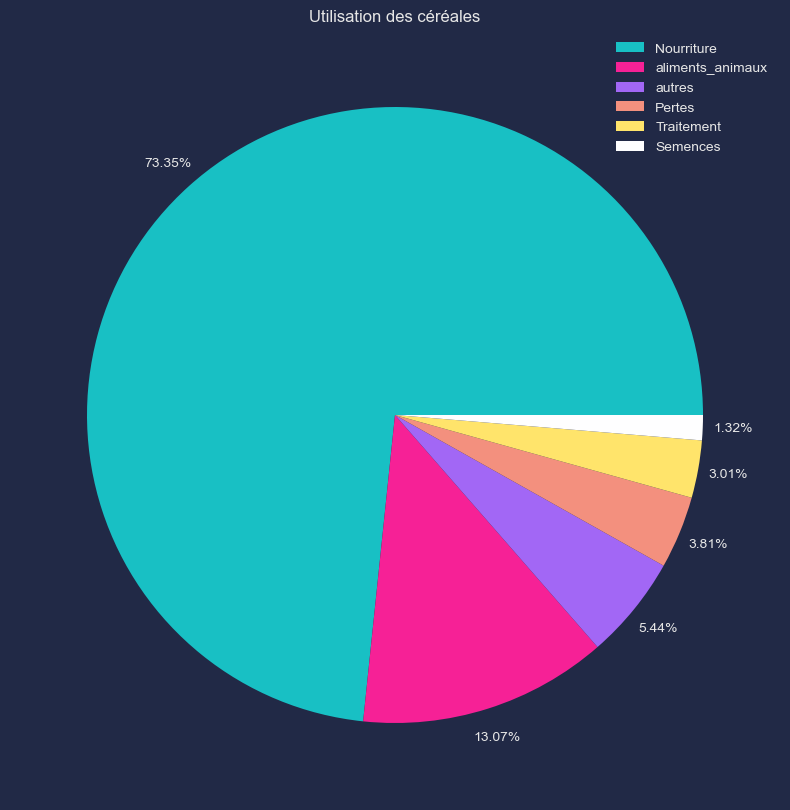

In [33]:
plt.figure(figsize =(10,10))
plt.pie(x=df_dispo_cereales_prop["value"], autopct = '%.2f%%', pctdistance = 1.1)
plt.legend(labels=["Nourriture", "aliments_animaux", "autres",  "Pertes", "Traitement", "Semences"])
plt.title("Utilisation des céréales")
plt.show()

## Zoom sur la Thaïlande

In [34]:
# Création d'un nouveau dataframe par filtrage pour se focaliser sur La Thaïlande. 
df_pop_thai = df_pop_sounourrie2017.query("Zone == 'Thaïlande'").copy()

# Ajout d'une colonne pour effectuer le calcul de pourcentage.
df_pop_thai["prop_thai_ssn"] = df_pop_thai["pop_sous_nutrition"]*100/df_pop_thai["Population"]

print(f"{round(df_pop_thai['prop_thai_ssn'].values[0],2)} % de la population est sous-alimentée")

8.96 % de la population est sous-alimentée


In [35]:
df_pop_thai

,Zone,Année,Population,pop_sous_nutrition,taux,prop_thai_ssn
176,Thaïlande,2017,"69,209,810.00","6,200,000.00",7.10,8.96


In [36]:
#  Création d'un nouveau dataframe en gardant les colonnes utiles et en filtrant par pays et produit.
 
df_manioc_thai = pd.DataFrame(df_dispo_alimentaire[["Zone","Produit",  "aliments_animaux", "autres",
                                       "dispo_interieure", "export_qte", "import_qte",
                                       "Nourriture", "Pertes", "Production", "Semences", "Traitement"]]
                                       .query("Zone == 'Thaïlande' & Produit == 'Manioc'")
                                        .copy()                         
                )

df_manioc_thai


,Zone,Produit,aliments_animaux,autres,dispo_interieure,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement
13809,Thaïlande,Manioc,"1,800.00","2,081.00","6,264.00","25,214.00","1,250.00",871.00,"1,511.00","30,228.00",0.00,0.00


In [37]:
# Création d'un nouveau dataframe par agrégation et projection qu’on dépivote pour aider au calcul et à la visualisation.

df_manioc_thai_prop = (df_manioc_thai[["aliments_animaux", "autres", "export_qte",
                                       "Nourriture", "Pertes"]]
                                        .melt()
                                        .sort_values(by="value", ascending=False)
                     )
# # Ajout d'une colonne pour effectuer le calcul de pourcentage.
df_manioc_thai_prop["taux"] = df_manioc_thai_prop["value"]*100/(df_manioc_thai["Production"].values)

# df_manioc_thai_prop
# print(f'La Thaïlande exporte {round(def_manioc_thai_prop.iloc[0,2],2)} % de sa production de manioc.')

In [38]:
df_manioc_thai_prop

,variable,value,taux
2,export_qte,"25,214.00",83.41
1,autres,"2,081.00",6.88
0,aliments_animaux,"1,800.00",5.95
4,Pertes,"1,511.00",5.00
3,Nourriture,871.00,2.88


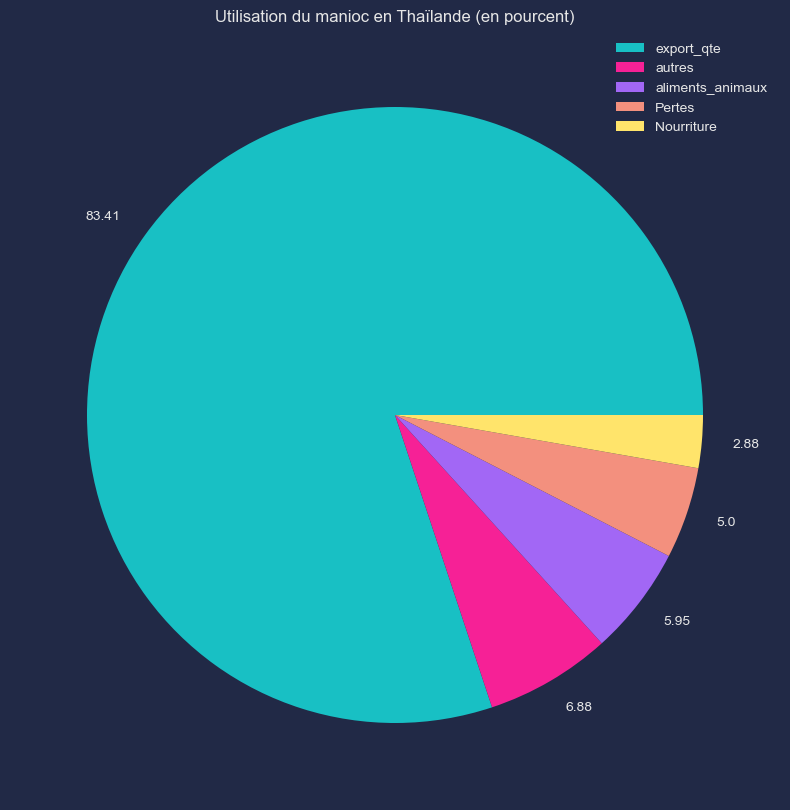

In [39]:
plt.figure(figsize =(10,10))
plt.pie(x=df_manioc_thai_prop["taux"], labels=round(df_manioc_thai_prop["taux"],2) )
plt.legend(labels=["export_qte", "autres","aliments_animaux" , "Pertes","Nourriture"])
plt.title("Utilisation du manioc en Thaïlande (en pourcent)")
plt.show()

# Questions Mélanie

## Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


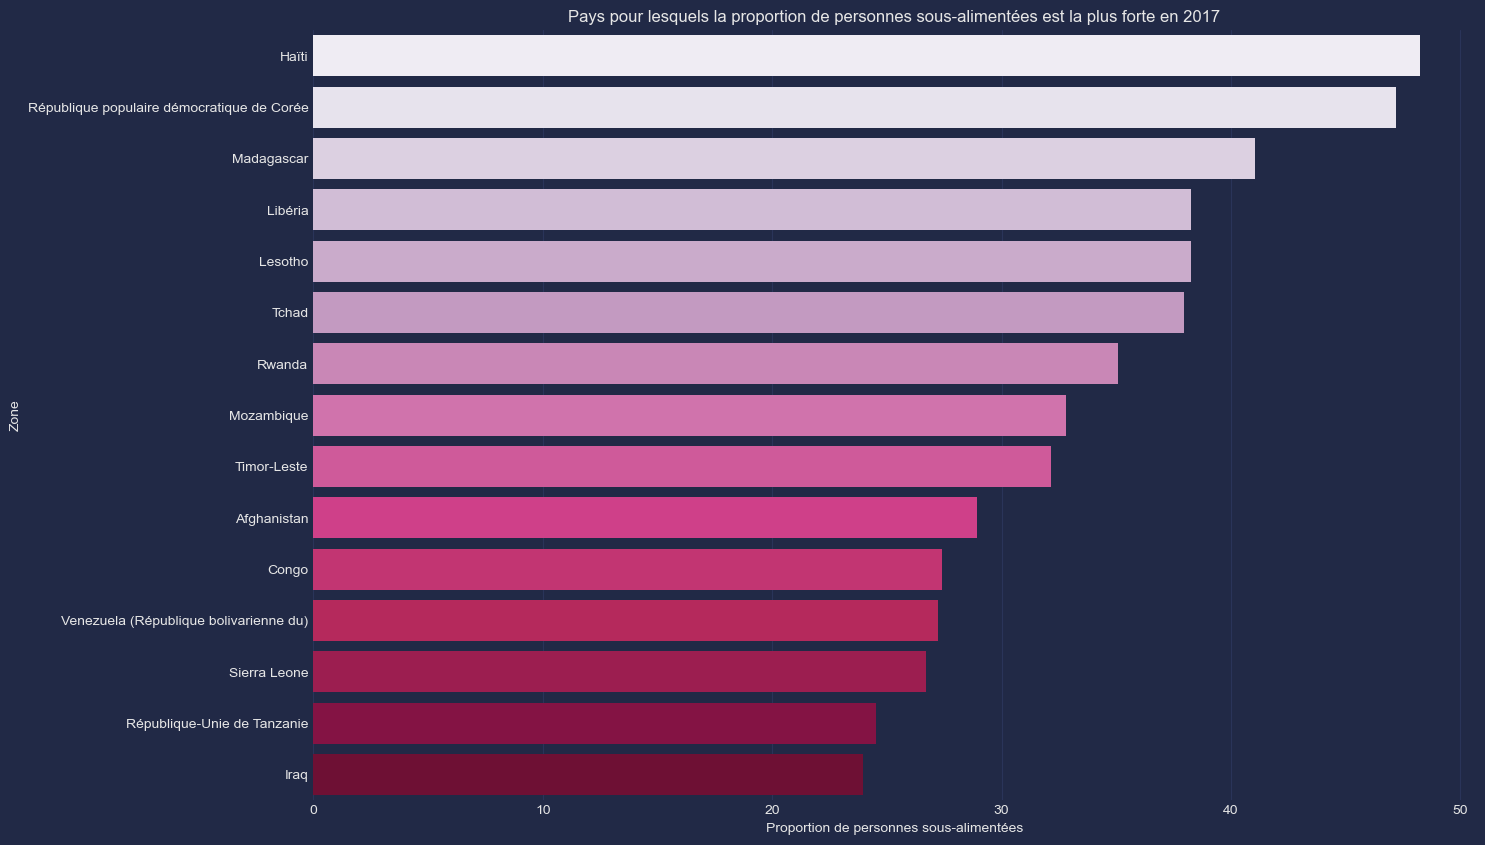

In [40]:
# Création d'une nouvelle colonne pour calculer la proportion de personnes sous-alimentées à partir du dataframe créé précédemment pour l'année 2017.
df_pop_sounourrie2017["prop_pop_ssnourrie"] = df_pop_sounourrie2017["pop_sous_nutrition"]*100/df_pop_sounourrie2017["Population"]

# Tri des valeurs de manière décroissante.
df_pop_sounourrie2017 = df_pop_sounourrie2017.sort_values(by="prop_pop_ssnourrie", ascending=False).head(15)

# Création d’un graphique.
plt.figure(figsize=(15,10))


sns.barplot(data= df_pop_sounourrie2017, x="prop_pop_ssnourrie", y='Zone', orient='h', palette='PuRd')\
    .set(title = "Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017",xlabel= "Proportion de personnes sous-alimentées")
plt.show()

## Pays qui ont le plus bénéficié d’aide depuis 2013

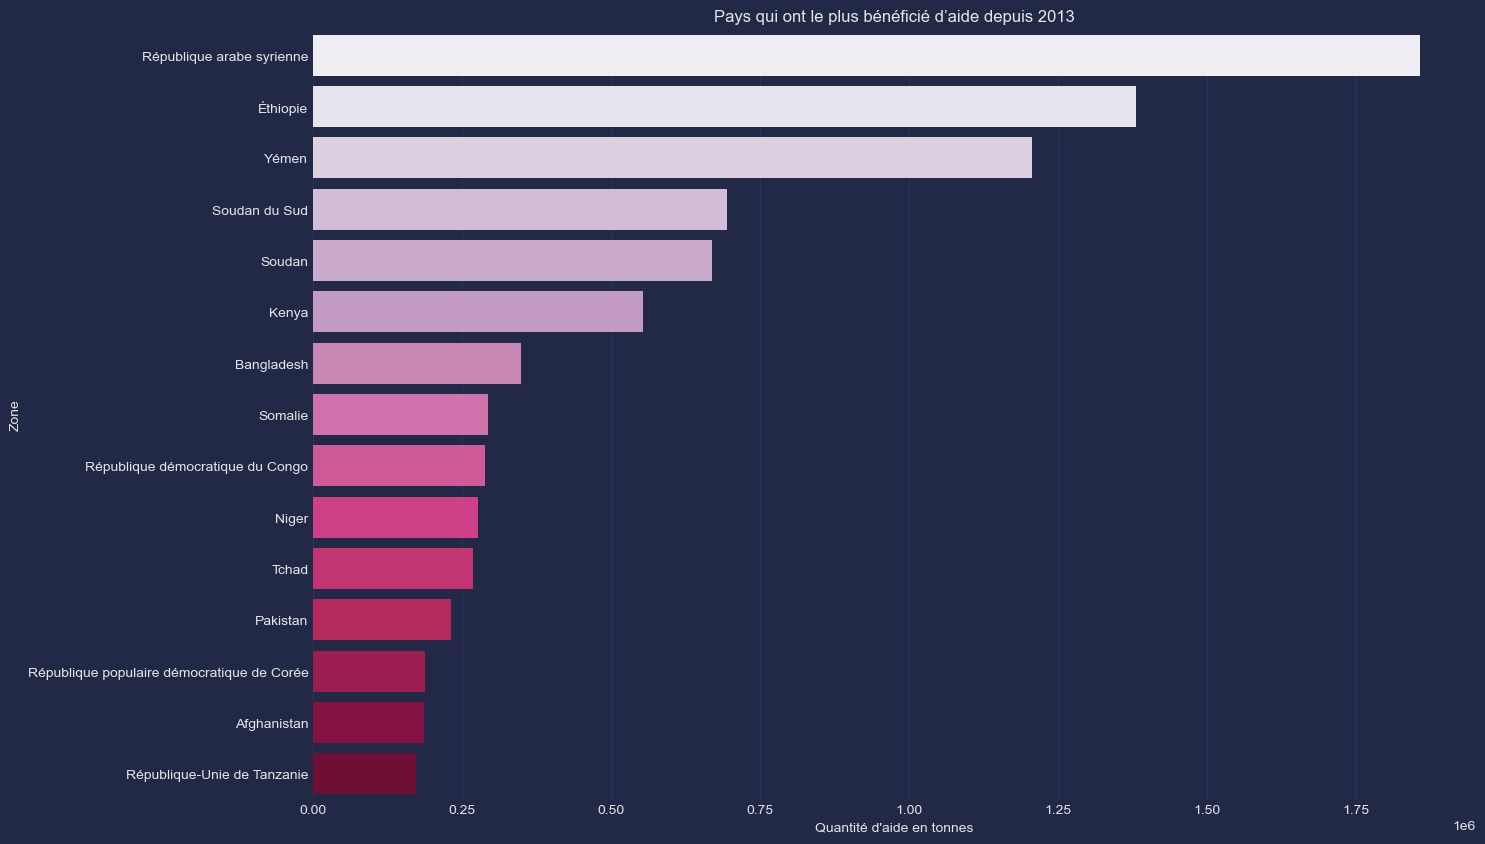

In [41]:
# Création d'un nouveau dataframe, groupage par zone et tri de la quantité d'aide de manière décroissante.
df_aide_2013 = (df_aide_alimentaire
                    .groupby("Zone")
                    .sum()
                    .sort_values(by="Quantite_Aide", ascending=False)
                    .reset_index()
                    .head(15)
                )



plt.figure(figsize=(15,10))


sns.barplot(data= df_aide_2013, x="Quantite_Aide", y='Zone', orient='h', palette='PuRd').set(title = 'Pays qui ont le plus bénéficié d’aide depuis 2013', xlabel= "Quantité d'aide en tonnes")

plt.show()

## Pays ayant le plus de disponibilité par habitant


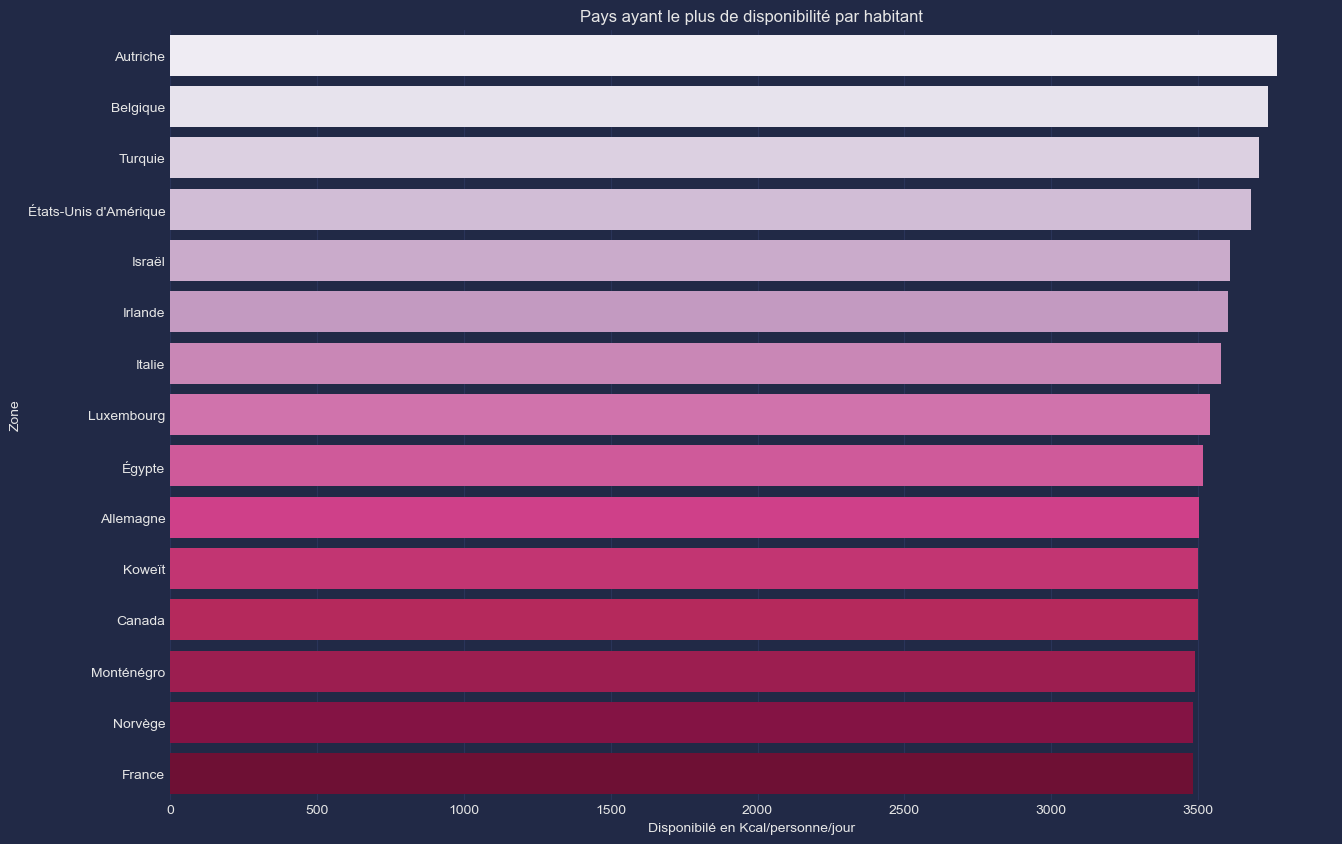

In [42]:
# Nouveau dataframe par projection et agrégation tri des valeurs de manière décroissante.
df_dispo_plus = (df_dispo_alimentaire[["Zone","dispo_alim_kcal_pers_j"]]
                      .groupby("Zone")
                      .sum()
                      .sort_values(by="dispo_alim_kcal_pers_j", ascending=False)
                      .reset_index()
                      .head(15)
                )

plt.figure(figsize=(15,10))

sns.barplot(data= df_dispo_plus, x='dispo_alim_kcal_pers_j', y='Zone', orient='h', palette='PuRd')\
      .set(title = 'Pays ayant le plus de disponibilité par habitant', xlabel="Disponibilé en Kcal/personne/jour")
plt.show()

## Pays ayant le moins de disponibilité par habitant


In [43]:
#  Même procédure que pour la question précédente avec un tri de manière croissante.
df_dispo_moins = (df_dispo_alimentaire[["Zone","dispo_alim_kcal_pers_j"]]
                       .groupby("Zone")
                       .sum()
                       .sort_values(by="dispo_alim_kcal_pers_j")
                       .head(15)
                )

df_dispo_moins["Zone"]=df_dispo_moins.index

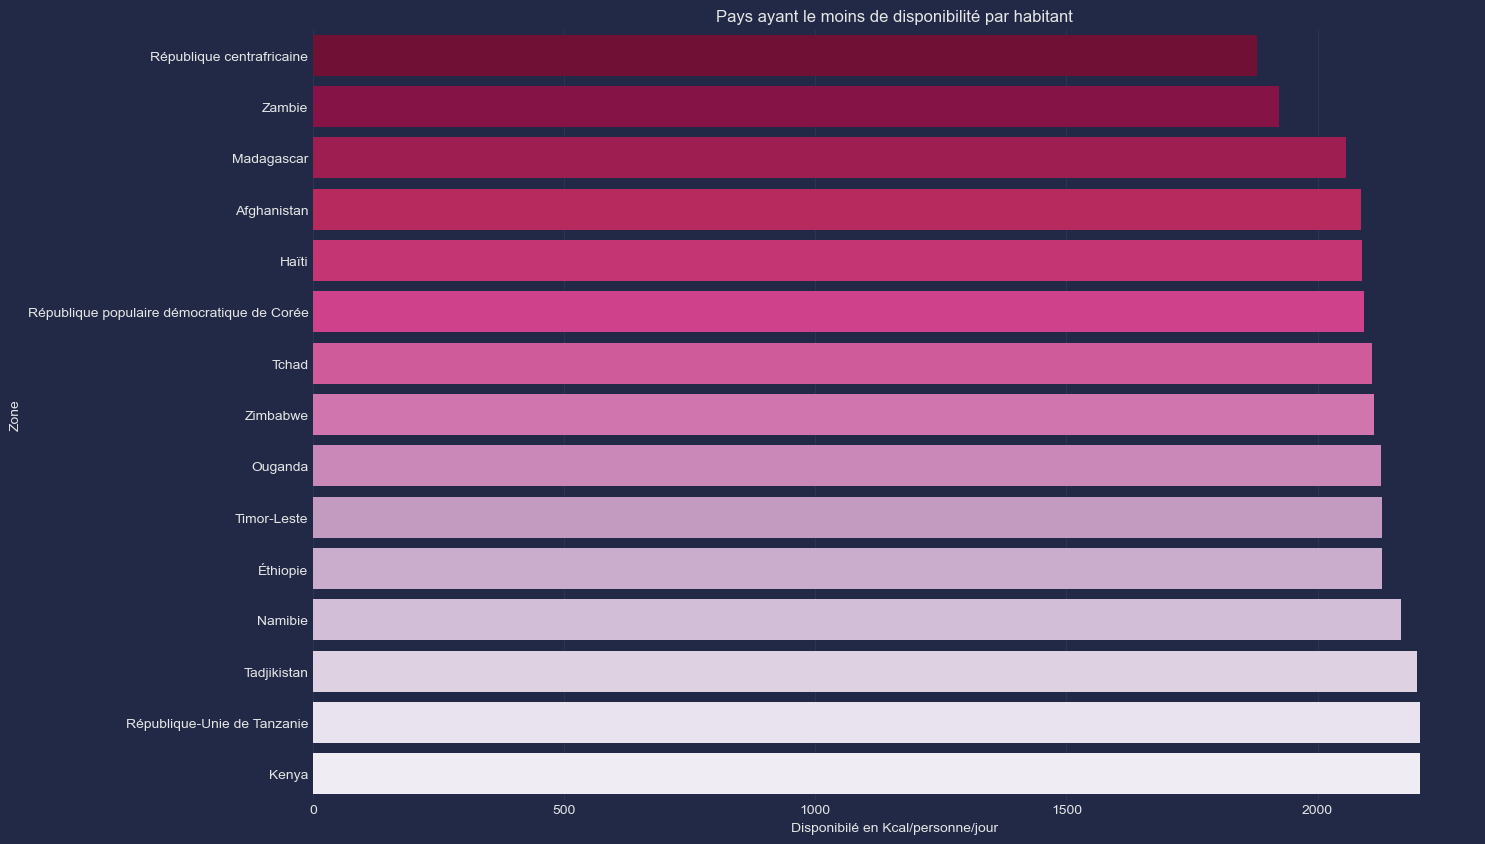

In [44]:
plt.figure(figsize=(15,10))

sns.barplot(data= df_dispo_moins, x="dispo_alim_kcal_pers_j", y="Zone", orient="h", palette="PuRd_r")\
    .set(title = "Pays ayant le moins de disponibilité par habitant", xlabel="Disponibilé en Kcal/personne/jour")
plt.show()